In [134]:
import pandas as pd
import optuna
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import math
import matplotlib.pyplot as plt

In [135]:
df = pd.read_csv('cardata.csv')

In [136]:
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


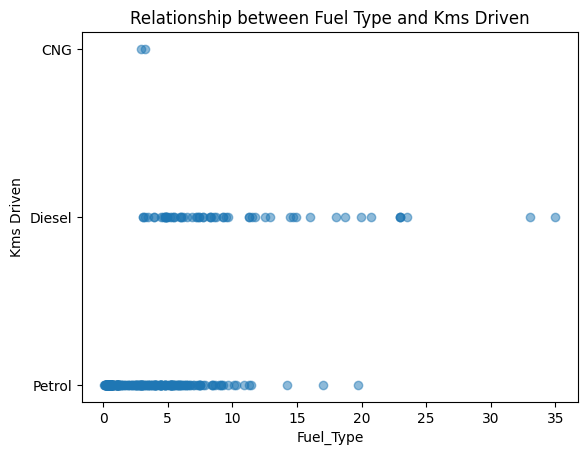

In [137]:
plt.scatter(df['Selling_Price'], df['Fuel_Type'], alpha=0.5)
plt.xlabel('Fuel_Type')
plt.ylabel('Kms Driven')
plt.title('Relationship between Fuel Type and Kms Driven')
plt.show()

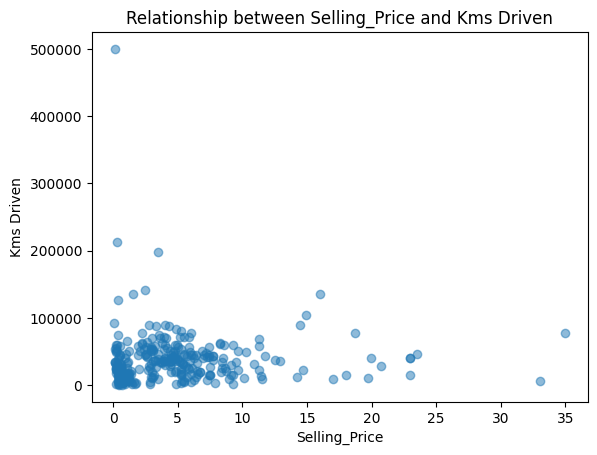

In [138]:
plt.scatter(df['Selling_Price'], df['Kms_Driven'], alpha=0.5)
plt.xlabel('Selling_Price')
plt.ylabel('Kms Driven')
plt.title('Relationship between Selling_Price and Kms Driven')
plt.show()

In [139]:
encoders = {}

for col in ['Fuel_Type', 'Transmission', 'Seller_Type', 'Car_Name']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [140]:
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0


In [141]:
scaler = MinMaxScaler()
df['Kms_Driven'] = scaler.fit_transform(df[['Kms_Driven']])

In [142]:
X = df[['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission']]
y = df['Selling_Price']

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)

LGBMRegressor()

In [145]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {math.sqrt(mse)}')
print(f'R2 Score: {r2}')

MSE: 1.9582877284282973
RMSE: 1.3993883408219097
R2 Score: 0.9149885809624932


In [146]:
print(le.classes_)

['800' 'Activa 3g' 'Activa 4g' 'Bajaj  ct 100' 'Bajaj Avenger 150'
 'Bajaj Avenger 150 street' 'Bajaj Avenger 220' 'Bajaj Avenger 220 dtsi'
 'Bajaj Avenger Street 220' 'Bajaj Discover 100' 'Bajaj Discover 125'
 'Bajaj Dominar 400' 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 135 LS'
 'Bajaj Pulsar 150' 'Bajaj Pulsar 220 F' 'Bajaj Pulsar NS 200'
 'Bajaj Pulsar RS200' 'Hero  CBZ Xtreme' 'Hero  Ignitor Disc'
 'Hero Extreme' 'Hero Glamour' 'Hero Honda CBZ extreme'
 'Hero Honda Passion Pro' 'Hero Hunk' 'Hero Passion Pro'
 'Hero Passion X pro' 'Hero Splender Plus' 'Hero Splender iSmart'
 'Hero Super Splendor' 'Honda Activa 125' 'Honda Activa 4G'
 'Honda CB Hornet 160R' 'Honda CB Shine' 'Honda CB Trigger'
 'Honda CB Unicorn' 'Honda CB twister' 'Honda CBR 150' 'Honda Dream Yuga '
 'Honda Karizma' 'Hyosung GT250R' 'KTM 390 Duke ' 'KTM RC200' 'KTM RC390'
 'Mahindra Mojo XT300' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 350' 'Royal Enfield Classic 500'
 'Royal Enfield Thunder 350' 'Royal Enfield 

In [147]:
for col, encoder in encoders.items():
    mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    print(f'\n{col} Mapping:')
    print(mapping)


Fuel_Type Mapping:
{'CNG': 0, 'Diesel': 1, 'Petrol': 2}

Transmission Mapping:
{'Automatic': 0, 'Manual': 1}

Seller_Type Mapping:
{'Dealer': 0, 'Individual': 1}

Car_Name Mapping:
{'800': 0, 'Activa 3g': 1, 'Activa 4g': 2, 'Bajaj  ct 100': 3, 'Bajaj Avenger 150': 4, 'Bajaj Avenger 150 street': 5, 'Bajaj Avenger 220': 6, 'Bajaj Avenger 220 dtsi': 7, 'Bajaj Avenger Street 220': 8, 'Bajaj Discover 100': 9, 'Bajaj Discover 125': 10, 'Bajaj Dominar 400': 11, 'Bajaj Pulsar  NS 200': 12, 'Bajaj Pulsar 135 LS': 13, 'Bajaj Pulsar 150': 14, 'Bajaj Pulsar 220 F': 15, 'Bajaj Pulsar NS 200': 16, 'Bajaj Pulsar RS200': 17, 'Hero  CBZ Xtreme': 18, 'Hero  Ignitor Disc': 19, 'Hero Extreme': 20, 'Hero Glamour': 21, 'Hero Honda CBZ extreme': 22, 'Hero Honda Passion Pro': 23, 'Hero Hunk': 24, 'Hero Passion Pro': 25, 'Hero Passion X pro': 26, 'Hero Splender Plus': 27, 'Hero Splender iSmart': 28, 'Hero Super Splendor': 29, 'Honda Activa 125': 30, 'Honda Activa 4G': 31, 'Honda CB Hornet 160R': 32, 'Honda CB

In [150]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [151]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)